In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization (optional for audit)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# CTM Feature Selection (Decision Tree / Random Forest)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# LSTM (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Utility
import json
import os

In [4]:


base_path = r"C:\Desktop\TON_IoT dataset\data"

file_names = [
    "Train_Test_IoT_Fridge.csv",
    "Train_Test_IoT_Garage_Door.csv",
    "Train_Test_IoT_GPS_Tracker.csv",
    "Train_Test_IoT_Modbus.csv",
    "Train_Test_IoT_Motion_Light.csv",
    "Train_Test_IoT_Thermostat.csv",
    "Train_Test_IoT_Weather.csv",
    "train_test_network.csv",
    "Train_Test_Windows_10.csv"
]

# Load all CSVs
dfs = []
for fn in file_names:
    full_path = os.path.join(base_path, fn)
    print("Loading:", full_path)
    df = pd.read_csv(full_path)
    df["source_file"] = fn   # keep track of origin
    dfs.append(df)

# Merge into one big dataset
ton_iot = pd.concat(dfs, ignore_index=True)

ton_iot.shape

Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_IoT_Fridge.csv
Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_IoT_Garage_Door.csv
Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_IoT_GPS_Tracker.csv
Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_IoT_Modbus.csv
Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_IoT_Motion_Light.csv
Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_IoT_Thermostat.csv
Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_IoT_Weather.csv
Loading: C:\Desktop\TON_IoT dataset\data\train_test_network.csv
Loading: C:\Desktop\TON_IoT dataset\data\Train_Test_Windows_10.csv


(493266, 188)

In [5]:
print("Merged shape:", ton_iot.shape)
print("\nColumns:")
print(ton_iot.columns.tolist())

ton_iot.head()

Merged shape: (493266, 188)

Columns:
['date', 'time', 'fridge_temperature', 'temp_condition', 'label', 'type', 'source_file', 'door_state', 'sphone_signal', 'latitude', 'longitude', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'motion_status', 'light_status', 'current_temperature', 'thermostat_status', 'temperature', 'pressure', 'humidity', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version', 'http_request_body_len', 'http_response_body_len', 'http_status_code', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_

,date,time,fridge_temperature,temp_condition,label,type,source_file,door_state,sphone_signal,latitude,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
0,25-Apr-19,19:19:40,9.00,high,1,ddos,Train_Test_IoT_Fridge.csv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-Apr-19,19:19:40,9.25,high,1,ddos,Train_Test_IoT_Fridge.csv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-Apr-19,19:19:45,12.65,high,1,ddos,Train_Test_IoT_Fridge.csv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-Apr-19,19:19:45,4.65,low,1,ddos,Train_Test_IoT_Fridge.csv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25-Apr-19,19:19:55,12.65,high,1,ddos,Train_Test_IoT_Fridge.csv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extract Only the 3 Required Features + Label

In [6]:
# Keep only the columns we need
required_cols = ["pressure", "temperature", "humidity", "label", "source_file"]

iot_clean = ton_iot[required_cols].copy()

iot_clean.head()

,pressure,temperature,humidity,label,source_file
0,NaN,NaN,NaN,1,Train_Test_IoT_Fridge.csv
1,NaN,NaN,NaN,1,Train_Test_IoT_Fridge.csv
2,NaN,NaN,NaN,1,Train_Test_IoT_Fridge.csv
3,NaN,NaN,NaN,1,Train_Test_IoT_Fridge.csv
4,NaN,NaN,NaN,1,Train_Test_IoT_Fridge.csv


In [7]:
iot_valid = iot_clean.dropna(
    subset=["pressure", "temperature", "humidity"]).copy()

print("Before:", iot_clean.shape)
print("After filtering:", iot_valid.shape)

iot_valid.head()

Before: (493266, 5)
After filtering: (39260, 5)


,pressure,temperature,humidity,label,source_file
221859,-0.101806,40.881866,38.363631,1,Train_Test_IoT_Weather.csv
221860,2.661616,44.913806,46.141423,1,Train_Test_IoT_Weather.csv
221861,-2.438871,38.295822,50.850643,1,Train_Test_IoT_Weather.csv
221862,-0.101806,41.306586,38.363631,1,Train_Test_IoT_Weather.csv
221863,3.080849,44.903178,46.141423,1,Train_Test_IoT_Weather.csv


In [8]:
iot_valid["label"].value_counts()

label
1    24260
0    15000
Name: count, dtype: int64

In [9]:
iot_valid["label"] = (
    iot_valid["label"]
    .replace({"Normal": 0, "normal": 0, "Attack": 1, "attack": 1})
    .astype(int)
)

In [10]:
iot_valid["label"].value_counts()

label
1    24260
0    15000
Name: count, dtype: int64

In [18]:
import os
import pandas as pd

base_path = r"C:\Desktop\TON_IoT dataset\data"
file_name = "Train_Test_IoT_Weather.csv"
full_path = os.path.join(base_path, file_name)

# Load ONLY the Weather dataset
df = pd.read_csv(full_path)

print("Before dropping NaNs:", df.shape)
# drop rows where sensor readings are missing
df = df.dropna(subset=["pressure", "temperature", "humidity"])
print("After dropping NaNs:", df.shape)

df.head()

Before dropping NaNs: (39260, 7)
After dropping NaNs: (39260, 7)


,date,time,temperature,pressure,humidity,label,type
0,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos


In [19]:
# Map labels (ensure all 0/1)
df["label"] = df["label"].replace(
    {"Normal": 0, "normal": 0, "Attack": 1, "attack": 1}).astype(int)

# Check class balance
print(df["label"].value_counts())

label
1    24260
0    15000
Name: count, dtype: int64


In [22]:
import joblib
from sklearn.preprocessing import StandardScaler
import os

FEATURES = ["pressure", "temperature", "humidity"]

# Scale features
scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])

# ✅ Specify the full path
results_path = r"C:\Desktop\TON_IoT dataset\results"  # your folder
scaler_file = os.path.join(results_path, "weather_scaler.pkl")

# Save the scaler
joblib.dump(scaler, scaler_file)
print(f"✔ Scaler saved at: {scaler_file}")

# Save the preprocessed CSV as well
csv_file = os.path.join(results_path, "ton_iot_eval.csv")
df.to_csv(csv_file, index=False)
print(f"✔ Preprocessed dataset saved at: {csv_file}")

df.head()

✔ Scaler saved at: C:\Desktop\TON_IoT dataset\results\weather_scaler.pkl
✔ Preprocessed dataset saved at: C:\Desktop\TON_IoT dataset\results\ton_iot_eval.csv


,date,time,temperature,pressure,humidity,label,type
0,25-Apr-19,17:33:16,0.706444,-0.294002,-0.311364,1,ddos
1,25-Apr-19,17:33:16,1.211632,0.573301,-0.046150,1,ddos
2,25-Apr-19,17:33:16,0.382421,-1.027492,0.114429,1,ddos
3,25-Apr-19,17:33:21,0.759660,-0.294002,-0.311364,1,ddos
4,25-Apr-19,17:33:21,1.210300,0.704878,-0.046150,1,ddos


In [23]:
import numpy as np
from tqdm import tqdm   
import os

WINDOW_SIZE = 30
FEATURES = ["pressure", "temperature", "humidity"]

# Sort dataset by date + time
df_sorted = df.sort_values(by=["date", "time"]).reset_index(drop=True)

# Extract feature values and labels
X_values = df_sorted[FEATURES].values
y_values = df_sorted["label"].values

X_seq = []
y_seq = []

# Sliding window
for i in tqdm(range(len(df_sorted) - WINDOW_SIZE + 1)):
    X_window = X_values[i:i+WINDOW_SIZE]
    y_window = y_values[i:i+WINDOW_SIZE]

    # Label = 1 if any attack occurs in window
    y_seq.append(1 if y_window.max() == 1 else 0)
    X_seq.append(X_window)

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print("X_seq shape:", X_seq.shape)
print("y_seq shape:", y_seq.shape)

# Save sequences
results_path = r"C:\Desktop\TON_IoT dataset\results"
np.save(os.path.join(results_path, "X_seq.npy"), X_seq)
np.save(os.path.join(results_path, "y_seq.npy"), y_seq)
print("✔ Sequences saved at:", results_path)

100%|██████████| 39231/39231 [00:00<00:00, 81058.15it/s]


X_seq shape: (39231, 30, 3)
y_seq shape: (39231,)
✔ Sequences saved at: C:\Desktop\TON_IoT dataset\results


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

# Paths
results_path = r"C:\Desktop\TON_IoT dataset\results"
X_seq = np.load(f"{results_path}/X_seq.npy")
y_seq = np.load(f"{results_path}/y_seq.npy")

print("Original shapes:")
print("X_seq:", X_seq.shape)
print("y_seq:", y_seq.shape)

# Train / Temp split (70% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_seq, y_seq, test_size=0.3, stratify=y_seq, random_state=42
)

# Validation / Test split (50%/50% of temp → 15%/15% total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Original shapes:
X_seq: (39231, 30, 3)
y_seq: (39231,)

Train shape: (27461, 30, 3) (27461,)
Validation shape: (5885, 30, 3) (5885,)
Test shape: (5885, 30, 3) (5885,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential([
    LSTM(64, input_shape=(30, 3), return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()

c:\Desktop\TON_IoT dataset\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,473 (68.25 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Path to save trained model
model_path = r"C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5"

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    model_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8465 - loss: 0.2695
Epoch 1: val_loss improved from None to 0.00735, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.9454 - loss: 0.1098 - val_accuracy: 0.9988 - val_loss: 0.0073
Epoch 2/20
429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9984 - loss: 0.0078
Epoch 2: val_loss improved from 0.00735 to 0.00212, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9984 - loss: 0.0078 - val_accuracy: 0.9998 - val_loss: 0.0021
Epoch 3/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9999 - loss: 0.0013
Epoch 3: val_loss improved from 0.00212 to 0.00190, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9996 - loss: 0.0036 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 4/20
429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9983 - loss: 0.0078
Epoch 4: val_loss improved from 0.00190 to 0.00170, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 5/20
429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9990 - loss: 0.0040
Epoch 5: val_loss improved from 0.00170 to 0.00155, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 6/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9997 - loss: 0.0026
Epoch 6: val_loss did not improve from 0.00155
430/430 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9981 - loss: 0.0097 - val_accuracy: 0.9995 - val_loss: 0.0127
Epoch 7/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9995 - loss: 0.0043
Epoch 7: val_loss improved from 0.00155 to 0.00075, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9998 - val_loss: 7.5466e-04
Epoch 8/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9999 - loss: 0.0015
Epoch 8: val_loss did not improve from 0.00075
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9999 - loss: 8.8925e-04 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 9/20
429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9999 - loss: 7.2952e-04
Epoch 9: val_loss improved from 0.00075 to 0.00036, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9999 - loss: 8.5726e-04 - val_accuracy: 0.9998 - val_loss: 3.5535e-04
Epoch 10/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9999 - loss: 0.0012
Epoch 10: val_loss improved from 0.00036 to 0.00008, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 1.0000 - loss: 4.9663e-04 - val_accuracy: 1.0000 - val_loss: 8.4903e-05
Epoch 11/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9999 - loss: 3.1836e-04
Epoch 11: val_loss did not improve from 0.00008
430/430 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9998 - val_loss: 8.5280e-04
Epoch 12/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9998 - loss: 0.0010
Epoch 12: val_loss improved from 0.00008 to 0.00007, saving model to C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5


430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9999 - loss: 8.5557e-04 - val_accuracy: 1.0000 - val_loss: 6.7671e-05
Epoch 13/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9999 - loss: 6.3515e-04
Epoch 13: val_loss did not improve from 0.00007
430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 1.0000 - loss: 4.2955e-04 - val_accuracy: 1.0000 - val_loss: 1.1545e-04
Epoch 14/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 4.3493e-04
Epoch 14: val_loss did not improve from 0.00007
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 1.0000 - loss: 4.8169e-04 - val_accuracy: 1.0000 - val_loss: 6.9279e-05
Epoch 15/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9999 - loss: 0.0010
Epoch 15: val_loss did not improve from 0.00007
430/430 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 1.0000 - loss: 4.4346e-04 - val_accuracy: 0.9998 - val_loss: 1.7223e-04
Epoch 16/20
429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - l

430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 1.0000 - loss: 4.1715e-04 - val_accuracy: 1.0000 - val_loss: 5.4085e-05
Epoch 17/20
428/430 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 2.1994e-04
Epoch 17: val_loss did not improve from 0.00005
430/430 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 1.0000 - loss: 3.7958e-04 - val_accuracy: 0.9998 - val_loss: 2.7926e-04
Epoch 18/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9999 - loss: 8.2843e-04
Epoch 18: val_loss did not improve from 0.00005
430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 1.0000 - loss: 3.8813e-04 - val_accuracy: 0.9998 - val_loss: 3.9282e-04
Epoch 19/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 1.2073e-04
Epoch 19: val_loss did not improve from 0.00005
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 1.0000 - loss: 4.3792e-04 - val_accuracy: 0.9998 - val_loss: 6.9194e-04
Epoch 20/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000

In [27]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import json

# Load the best model
best_model = load_model(
    r"C:\Desktop\TON_IoT dataset\results\iot_lstm_model.h5")

# Predict on test set
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

metrics = {
    "accuracy": float(accuracy),
    "f1_score": float(f1),
    "roc_auc": float(roc_auc)
}

# Save metrics
metrics_path = r"C:\Desktop\TON_IoT dataset\results\ton_eval.json"
with open(metrics_path, "w") as f:
    json.dump(metrics, f, indent=4)

print("✔ Evaluation complete. Metrics saved at:", metrics_path)
print(metrics)

184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
✔ Evaluation complete. Metrics saved at: C:\Desktop\TON_IoT dataset\results\ton_eval.json
{'accuracy': 1.0, 'f1_score': 1.0, 'roc_auc': 1.0}


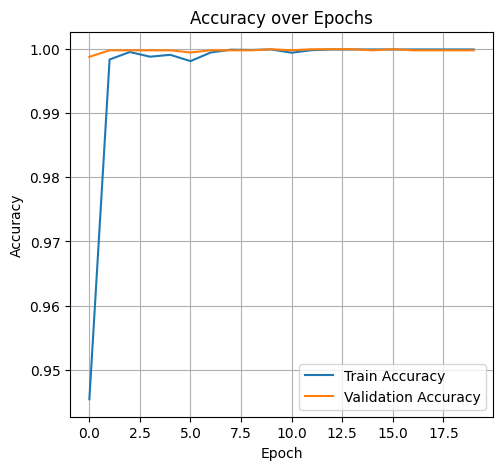

In [28]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


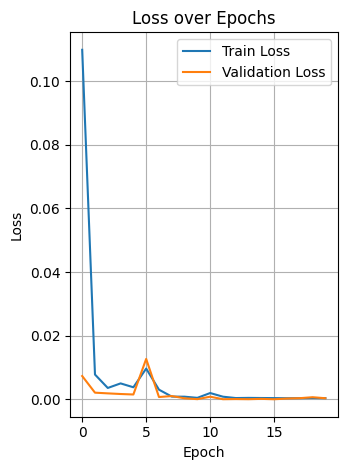

In [29]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [1]:
import json
import os

# Make sure the results folder exists
results_path = r"C:\Desktop\TON_IoT dataset\results"
os.makedirs(results_path, exist_ok=True)

# File path to save features list
features_file = os.path.join(results_path, "feature_list.json")

# Features used
FEATURES = ["pressure", "temperature", "humidity"]

# Save to JSON
with open(features_file, "w") as f:
    json.dump(FEATURES, f, indent=4)

print("✔ Features list saved at:", features_file)

✔ Features list saved at: C:\Desktop\TON_IoT dataset\results\feature_list.json
